In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import pandas as pd
from pathlib import Path
from nltk.tokenize import word_tokenize, sent_tokenize
import plotly.express as px
from plotly.offline import iplot

import os
import cv2
import argparse
import numpy as np
import pandas as pd
import glob
from PIL import Image
import datetime
import matplotlib.pyplot as plt

from collections import Counter
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras.callbacks import Callback
from keras.backend import clear_session
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications import resnet50, mobilenet, xception
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_ing = ["acidulated water,ackee,acorn squash,aduki beans,advocaat,agar-agar,ale,alfalfa sprouts,allspice,almond,almond essence,almond extract,amaranth,amaretti,anchovies,anchovy essence,angelica,angostura bitters,anise,apple,apple chutney,apple juice,apple sauce,apricot,apricot jam,arborio rice,arbroath smokie,argan oil,arrowroot,artichoke,asafoetida,asparagus,aubergine,avocado,bacon,bagel,baguette,baked beans,baking,baking powder,balsamic vinegar,bamboo shoots,banana,banana bread,barbary duck,barbecue sauce,barley,basil,basmati rice,bay boletes,bay leaf,beans,beansprouts,bechamel sauce,beef,beef consomme,beef dripping,beef mince,beef ribs,beef rump,beef sausage,beef stock,beef tomato,beer,beetroot,berry,betel leaves,beurre manie,bicarbonate of soda,bilberries,bird's-eye chillies,biscotti,biscuits,blachan,black beans,black bream,black eyed beans,black pepper,black pudding,black sesame seeds,black treacle,blackbean sauce,blackberry,blackcurrant,blackcurrant juice drink,blini,blood orange,blueberry,boar,bok choi,bonito,borage,borlotti beans,bouquet garni,braising steak,bramley apple,bran,brandy,brandy butter,brandy snaps,bratwurst,brazil nut,bread,bread roll,bread sauce,breadcrumbs,breadfruit,breadsticks,bresaola,brie,brill,brioche,brisket,broad beans,broccoli,broth,brown bread,brown lentil,brown rice,brown sauce,brown shrimp,brown sugar,brussels sprouts,buckwheat,buckwheat flour,bulgur wheat,buns,burger,butter,butter beans,buttercream icing,butterhead lettuce,buttermilk,butternut squash,cabbage,caerphilly,cake,calasparra rice,calvados,camembert,campagne loaf,candied peel,cannellini beans,cape gooseberries,capers,capsicum,caramel,caraway seeds,cardamom,carob,carrageen moss,carrageen_moss,carrot,cashew,cassava,caster sugar,catfish,caul fat,cauliflower,cava,caviar,cavolo nero,cayenne pepper,celeriac,celery,celery seeds,champ,champagne,chanterelle mushrooms,chantilly cream,chapati flour,chapatis,charcuterie,chard,charlotte potato,chayote,cheddar,cheese,cheese sauce,cherry,cherry brandy,cherry tomatoes,chervil,cheshire,chestnut,chestnut mushrooms,chicken,chicken breast,chicken casserole,chicken leg,chicken liver,chicken soup,chicken stock,chicken thigh,chicken wing,chickpea,chickpea flour,chicory,chilli,chilli con carne,chilli oil,chilli paste,chilli powder,chilli sauce,chinese cabbage,chinese mushrooms,chinese pancake,chipotle,chips,chives,chocolate,chocolate biscuit,chocolate brownies,chocolate cake,chocolate mousse,chocolate truffle,chopped tomatoes,chorizo,choux pastry,christmas cake,christmas pudding,chuck and blade,chump,chutney,ciabatta,cider,cinnamon,citrus fruit,clams,clarified butter,clementine,clotted cream,cloves,cobnut,cockles,cocktail,cocoa butter,cocoa powder,coconut,coconut cream,coconut milk,coconut oil,cod,cod roe,coffee,coffee beans,coffee essence,coffee granules,coffee liqueur,cognac,cola,coleslaw,coley,collar,compote,comte,condensed milk,confectionery,coriander,coriander cress,coriander seeds,corn oil,corn syrup,corned beef,cornflour,cos lettuce,cottage cheese,coulis,courgette,court bouillon,couscous,crab,crab apple,crackers,cranberry,cranberry juice,cranberry sauce,crayfish,cream,cream cheese,cream liqueur,cream of tartar,cream soda,creamed coconut,creme fraiche,crepe,cress,crispbread,crisps,croissant,crostini,croutons,crudites,crumble,crystallised ginger,cucumber,cumberland sauce,cumin,curacao,curd,curd cheese,curly kale,currant bread,currants,curry,curry leaves,curry paste,curry powder,custard,custard powder,cuttlefish,dab,daikon,damsons,dandelion,danish blue,dark chocolate,date,demerara sugar,demi-glace sauce,desiccated coconut,desiree,digestive biscuit,dijon mustard,dill,dim sum wrappers,dolcelatte,double cream,double gloucester,dover sole,dragon fruit,dried apricots,dried cherries,dried chilli,dried fruit,dried mixed fruit,dry sherry,duck,duck confit,duck fat,dulce de leche,dumplings,duxelles,edam,eel,egg,egg wash,egg white,egg yolk,elderberries,elderflower,emmental,english muffin,english mustard,escalope,evaporated milk,exotic fruit,farfalle,fat,fennel,fennel seeds,fenugreek,feta,fettuccine,field mushroom,fig,fillet of beef,filo pastry,fish,fish roe,fish sauce,fish soup,five-spice powder,flageolet beans,flaked almonds,flank,flapjacks,flatbread,flatfish,fleur de sel,flour,flour tortilla,floury potato,flying fish,focaccia,foie gras,fondant icing,fondant potatoes,fontina cheese,food colouring,forced rhubarb,fortified wine,fragrant rice,frangipane,frankfurter,freekeh,french beans,french bread,french dressing,fresh coriander,fresh tuna,fromage frais,fruit,fruit brandy,fruit cake,fruit juice,fruit salad,fudge,fusilli,galangal,game,gammon,garam masala,garlic,garlic and herb cream cheese,garlic bread,gelatine,ghee,gherkin,giblets,gin,ginger,ginger ale,ginger beer,ginger biscuit,gingerbread,glace cherries,globe artichoke,glucose,gnocchi,goats' cheese,goats' milk,golden syrup,goose,goose fat,gooseberry,gorgonzola,gouda,grain,grape juice,grapefruit,grapefruit juice,grapes,grapeseed oil,gratin,gravy,gravy browning,green banana,green beans,green cabbage,green lentil,green tea,greengages,grey mullet,ground almonds,ground ginger,grouse,gruyere,guacamole,guava,guinea fowl,gurnard,habanero chillies,haddock,haggis,hake,halibut,halloumi,ham,hare,haricot beans,harissa,hazelnut,hazelnut oil,heart,herbal liqueur,herbal tea,herbes de provence,herbs,herring,hogget,hoisin sauce,hoki,hollandaise sauce,hominy,honey,honeycomb,horseradish,horseradish sauce,hot cross buns,hummus,hunza apricots,ice cream,iceberg lettuce,icing,icing sugar,irish stout,jaggery,jam,january king cabbage,japanese pumpkin,jelly,jerk seasoning,jersey royal potatoes,jerusalem artichoke,john dory,jujube,juniper berries,jus,kabana,kale,ketchup,ketjap manis,kidney,kidney beans,king edward,kipper,kirsch,kiwi fruit,kohlrabi,kumquat,lager,lamb,lamb breast,lamb chop,lamb fillet,lamb kidney,lamb loin,lamb mince,lamb neck,lamb rump,lamb shank,lamb shoulder,lamb stock,lancashire,langoustine,lard,lardons,lasagne,lasagne sheets,laverbread,leek,leftover turkey,leg of lamb,lemon,lemon balm,lemon curd,lemon juice,lemon sole,lemonade,lemongrass,lentils,lettuce,lime,lime cordial,lime juice,lime leaves,lime pickle,ling,lingonberry,linguine,liqueur,liquorice,little gem lettuce,liver,loaf cake,lobster,loganberry,long-grain rice,lovage,lychee,macadamia,macaroni,macaroon,mace,mackerel,madeira,madeira cake,madeleines,maize,malted grain bread,manchego,mandarin,mangetout,mango,mango chutney,mango juice,mango pickle,mangosteen,maple syrup,margarine,marjoram,marmalade,marrow,marrowfat peas,marsala wine,marshmallow,marzipan,mascarpone,mashed potato,matzo,mayonnaise,meat,medlars,megrim,melon,melon seeds,meringue,mesclun,milk,milk chocolate,milkshake,millet,millet flour,mince,mince pies,mincemeat,mint,mint sauce,mirepoix,mirin,miso,mixed berries,mixed dried beans,mixed fish,mixed nuts,mixed spice,mixed spices,molasses,monk's beard,monkfish,morel,mortadella,mozzarella,muesli,muffins,mulberries,mulled wine,mung beans,mushroom,mussels,mustard,mustard cress,mustard leaves,mustard oil,mustard powder,mustard seeds,mutton,naan bread,nachos,nashi,nasturtium,nectarine,nettle,new potatoes,nibbed almonds,noodle soup,noodles,nori,nougat,nut,nutmeg,oatcakes,oatmeal,oats,octopus,offal,oil,oily fish,okra,olive,olive oil,onion,orange,orange juice,orange liqueur,oregano,ouzo,oxtail,oyster,oyster mushrooms,oyster sauce,paella,pak choi,palm sugar,pancakes,pancetta,pandan leaves,paneer,panettone,papaya,pappardelle,paprika,parfait,parmesan,parsley,parsnip,partridge,passata,passion fruit,passion fruit juice,pasta,pastrami,pastry,pasty,pate,paw-paw,pea shoots,peach,peanut butter,peanut oil,peanuts,pear,pearl barley,peas,pecan,pecorino,pectin,peel,penne,pepper,peppercorn,pepperoni,perch,perry,pesto,pheasant,piccalilli,pickle,pickled onion,pie,pig cheeks,pigeon,pigeon peas,pike,pine nut,pineapple,pineapple juice,pink fir apple,pink peppercorn,pinto beans,piri-piri,pistachio,pitta bread,pizza,plaice,plain flour,plantain,plum,polenta,pollack,pollock,pomegranate,pomegranate juice,pomelo,popcorn,poppy seeds,porcini,pork,pork belly,pork chop,pork fillet,pork leg,pork loin,pork mince,pork sausages,pork shoulder,pork spare rib,port,portobello mushrooms,potato,potato rosti,potato wedges,poultry,poussin,praline,prawn,prawn crackers,preserved lemons,preserves,prosciutto,prune,prune juice,pudding rice,puff pastry,pulled pork,pumpernickel bread,pumpkin,pumpkin seed,purple sprouting broccoli,puy lentils,quail,quail's egg,quatre-epices,quince,quinoa,rabbit,rack of lamb,radicchio,radish,rainbow chard,rainbow trout,raisins,raita,rapeseed oil,ras-el-hanout,raspberry,raspberry jam,ratafia biscuits,ratatouille,red cabbage,red leicester,red lentil,red mullet,red onion,red rice,red snapper,red wine,red wine vinegar,redcurrant,redcurrant jelly,rennet,rhubarb,rib of beef,rice,rice flour,rice noodles,rice pudding,rice vinegar,rice wine,ricotta,rigatoni,risotto,risotto rice,roast beef,roast chicken,roast lamb,roast pork,roast potatoes,roast turkey,roasted vegetables,rock salmon,rock salt,rocket,root beer,root vegetable,roquefort,rose wine,rosehip syrup,rosemary,rosewater,rouille,royal icing,rum,rump,runner beans,rye bread,rye flour,safflower oil,saffron,sage,salad,salad cream,salad leaves,salami,salmon,salsa,salsify,salt,salt beef,salt cod,sambuca,samphire,sardine,sashimi,satsuma,sauces,saucisson,sausage,savory,savoy cabbage,scallop,scotch bonnet chilli,scrag,sea bass,sea bream,sea salt,sea trout,seafood,seasoning,seaweed,seeds,self-raising flour,semolina,serrano ham,sesame oil,sesame seeds,seville orange,shallot,sharon fruit,shellfish,sherry,sherry vinegar,shiitake mushroom,shin,shortbread,shortcrust pastry,sichuan pepper,silverside,single cream,sirloin,skate,sloe,sloe gin,smoked cheese,smoked fish,smoked haddock,smoked mackerel,smoked salmon,smoked trout,snapper,soba noodles,soda,soda bread,sole,sorbet,sorrel,soup,sourdough bread,soured cream,soy sauce,soya beans,soya flour,soya milk,soya oil,spaghetti,spaghetti squash,sparkling wine,spelt,spelt flour,spices,spinach,split peas,sponge cake,spring greens,spring onion,spring roll wrappers,squash,squid,star anise,starfruit,steak,stem ginger,stew,stewing lamb,stilton,stock,straw mushroom,strawberry,strawberry jam,strega liqueur,strong white flour,stuffing,sucralose,suet,sugar,sugar-snap peas,sultanas,sumac,summer cabbage,summer fruit,sunflower oil,sunflower seed,sushi rice,swede,sweet potato,sweet sherry,sweetbread,sweetcorn,swiss chard,swiss rolls and roulades,swordfish,syrup,t-bone steak,tabasco,taco,tagliatelle,tahini,taleggio,tamari,tamarillo,tamarind,tangerine,tapenade,tapioca,taro,tarragon,tartare sauce,tayberry,tea,tempura,tequila,teriyaki,teriyaki sauce,terrine,thai basil,thyme,tilapia,tinned tuna,toffee,tofu,tomatillo,tomato,tomato chutney,tomato juice,tomato puree,tongue,tonic,topside,tortellini,tripe,trout,truffle,truffle oil,turbot,turkey,turkey breast,turkey mince,turkish delight,turmeric,turnip,unleavened bread,vacherin,vanilla essence,vanilla extract,vanilla pod,veal,vegetable oil,vegetable shortening,vegetable stock,vegetables,vegetarian sausage,venison,verjus,vermicelli,vermouth,vine leaves,vinegar,vodka,vodka cocktail,waffles,walnut,walnut oil,wasabi,water chestnut,watercress,watermelon,waxy potato,webbs lettuce,wensleydale,wheatgerm,whelk,whipping cream,whisky,whisky cocktail,whisky liqueur,white bread,white cabbage,white chocolate,white fish,white pepper,white wine,white wine vinegar,whitebait,whitecurrant,whiting,whole wheat pasta,wholegrain mustard,wholemeal bread,wholemeal flour,wild duck,wild garlic,wild mushrooms,wild rice,wine,winkles,wood pigeon,worcestershire sauce,wraps,yam,yeast,yellow lentil,yoghurt,zander,zest"]

In [4]:
# data_path = "/content/drive/MyDrive/gproject/Food Images/Food Images"
images_fl = "/content/drive/MyDrive/DeepLearning/projectm/project/dataset/FoodImages/FoodImages"

IMAGE_DIR = "/content/drive/MyDrive/DeepLearning/projectm/project/dataset/FoodImages/FoodImages"


In [5]:
csv_path='/content/drive/MyDrive/DeepLearning/Project/data/Food Ingredients and Recipe Dataset with Image Name Mapping.csv'

In [6]:
base_ing = base_ing[0].split(",")


In [7]:
df=pd.read_csv(csv_path)


In [8]:
df.Image_Name

,Image_Name
0,miso-butter-roast-chicken-acorn-squash-panzanella
1,crispy-salt-and-pepper-potatoes-dan-kluger
2,thanksgiving-mac-and-cheese-erick-williams
3,italian-sausage-and-bread-stuffing-240559
4,newtons-law-apple-bourbon-cocktail
...,...
13496,brownie-pudding-cake-14408
13497,israeli-couscous-with-roasted-butternut-squash...
13498,rice-with-soy-glazed-bonito-flakes-and-sesame-...
13499,spanakopita-107344


In [9]:
cleaned_ingredients=df['Cleaned_Ingredients'].tolist()


In [ ]:
len(cleaned_ingredients)


13501

In [10]:
df.shape

(13501, 6)

In [ ]:

! pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.6 MB/s eta 0:00:00


In [11]:
# Ingredients vocabulary
# ingredients_vocabulary = [
#     'salt', 'black pepper', 'sugar', 'flour', 'butter', 'milk', 'water', 'egg whites', 'oil',
#     'onion', 'garlic powder', 'chicken', 'beef', 'pork', 'bacon', 'cheese', 'tomato', 'potato',
# ]
ingredients_vocabulary=base_ing
# recipes = [
#     "['2 large egg whites', '1 pound new potatoes (about 1 inch in diameter)', '2 teaspoons kosher salt']",
#     "['1 cup evaporated milk', '1 cup whole milk', '1 tsp. garlic powder']"
# ]
recipes=cleaned_ingredients

extracted_ingredients = []

for recipe in recipes:
    ingredients = []
    for ingredient in recipe.split("', '"):
        # print(ingredient)
        for vocab_ingredient in ingredients_vocabulary:
            # print(vocab_ingredient)
            if vocab_ingredient in ingredient:
                ingredients.append(vocab_ingredient)
    extracted_ingredients.append(ingredients)

print(extracted_ingredients)


Output hidden; open in https://colab.research.google.com to view.

In [12]:

df.Cleaned_Ingredients[0]

'[\'1 (3½–4-lb.) whole chicken\', \'2¾ tsp. kosher salt, divided, plus more\', \'2 small acorn squash (about 3 lb. total)\', \'2 Tbsp. finely chopped sage\', \'1 Tbsp. finely chopped rosemary\', \'6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature\', \'¼ tsp. ground allspice\', \'Pinch of crushed red pepper flakes\', \'Freshly ground black pepper\', \'⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups)\', \'2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces\', \'2 Tbsp. extra-virgin olive oil\', \'½ small red onion, thinly sliced\', \'3 Tbsp. apple cider vinegar\', \'1 Tbsp. white miso\', \'¼ cup all-purpose flour\', \'2 Tbsp. unsalted butter, room temperature\', \'¼ cup dry white wine\', \'2 cups unsalted chicken broth\', \'2 tsp. white miso\', \'Kosher salt\', \'freshly ground pepper\']'

In [13]:
new_ingredient_lists=extracted_ingredients


In [ ]:
len(new_ingredient_lists)

13501

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

sf = pd.DataFrame(mlb.fit_transform(new_ingredient_lists),columns=mlb.classes_)

In [15]:
from PIL import UnidentifiedImageError
import tensorflow as tf

def data_generator(df):
    for _, row in df.iterrows():
        try:
            image = row['image']
            label = row['encoded_ingredients']
            yield image, label
        except (UnidentifiedImageError, Exception) as e:
            print(f"Skipping corrupted image: {e}")

In [ ]:
sf


,ackee,acorn squash,agar-agar,ale,alfalfa sprouts,allspice,almond,almond extract,amaranth,amaretti,...,wild mushrooms,wild rice,wine,worcestershire sauce,wraps,yam,yeast,yellow lentil,yoghurt,zest
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sf.columns[0:100]


Index(['ackee', 'acorn squash', 'agar-agar', 'ale', 'alfalfa sprouts',
       'allspice', 'almond', 'almond extract', 'amaranth', 'amaretti',
       'anchovies', 'angelica', 'angostura bitters', 'anise', 'apple',
       'apple chutney', 'apple juice', 'apricot', 'apricot jam',
       'arborio rice', 'arrowroot', 'artichoke', 'asafoetida', 'asparagus',
       'avocado', 'bacon', 'bagel', 'baguette', 'baking', 'baking powder',
       'balsamic vinegar', 'bamboo shoots', 'banana', 'barbecue sauce',
       'barley', 'basil', 'basmati rice', 'bay leaf', 'beans', 'beef',
       'beef ribs', 'beef rump', 'beef sausage', 'beef stock', 'beer',
       'beetroot', 'berry', 'betel leaves', 'bicarbonate of soda', 'biscotti',
       'biscuits', 'black beans', 'black pepper', 'black sesame seeds',
       'blackberry', 'blackcurrant', 'blini', 'blood orange', 'blueberry',
       'boar', 'bonito', 'borage', 'borlotti beans', 'bouquet garni', 'bran',
       'brandy', 'bratwurst', 'brazil nut', 'bread', 

In [16]:
image_height, image_width = 224, 224
image_names=df['Image_Name'].tolist()

In [17]:
image_dir  = "/content/drive/MyDrive/DeepLearning/projectm/project/dataset/FoodImages/FoodImages"

csv_path


'/content/drive/MyDrive/DeepLearning/Project/data/Food Ingredients and Recipe Dataset with Image Name Mapping.csv'

In [18]:
def load_and_preprocess_image(image_path, image_height, image_width):

    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [image_height, image_width])
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img / 255.0

    return img

In [ ]:
image_dir

'/content/drive/MyDrive/DeepLearning/projectm/project/dataset/FoodImages/FoodImages'

In [ ]:
df.Image_Name


,Image_Name
0,miso-butter-roast-chicken-acorn-squash-panzanella
1,crispy-salt-and-pepper-potatoes-dan-kluger
2,thanksgiving-mac-and-cheese-erick-williams
3,italian-sausage-and-bread-stuffing-240559
4,newtons-law-apple-bourbon-cocktail
...,...
13496,brownie-pudding-cake-14408
13497,israeli-couscous-with-roasted-butternut-squash...
13498,rice-with-soy-glazed-bonito-flakes-and-sesame-...
13499,spanakopita-107344


In [19]:
import ast
import numpy as np

def custom_data_generator(image_paths, binary_labels, image_dir, image_height, image_width, batch_size):
    num_samples = len(image_paths)
    start = 0

    while True:
        end = start + batch_size
        if end >= num_samples:
            end = num_samples
            start = 0
        batch_image_paths = image_paths[start:end]
        batch_binary_labels = binary_labels[start:end]
        images = []

        for img_name in batch_image_paths:
            img_path = image_dir +'/' +img_name + '.jpg'
            img = load_and_preprocess_image(img_path, image_height, image_width)
            images.append(img)

        start = end

        yield np.array(images), batch_binary_labels

datagen = custom_data_generator(image_names, sf, image_dir, image_height, image_width, batch_size=32)

In [20]:
images, labels = next(datagen)


In [21]:
X_train_images = images

y_train_labels = labels

X_train, X_temp, y_train, y_temp = train_test_split(X_train_images, y_train_labels, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



def f1_score_metric(y_true, y_pred):
    y_pred_binary = K.round(y_pred)

    y_true = K.cast(y_true, 'float32')
    y_pred_binary = K.cast(y_pred_binary, 'float32')

    true_positives = K.sum(K.round(K.clip(y_true * y_pred_binary, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred_binary, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
)

datagen.fit(X_train)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.7))
model.add(Dense(y_train_labels.shape[1], activation='sigmoid'))


model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])





In [23]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.0000e+00 - loss: 1.4845 - val_accuracy: 0.0000e+00 - val_loss: 1.1800
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.0000e+00 - loss: 3.3587 - val_accuracy: 0.0000e+00 - val_loss: 1.1970
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.0000e+00 - loss: 2.7063 - val_accuracy: 0.0000e+00 - val_loss: 1.2292
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.0000e+00 - loss: 2.3720 - val_accuracy: 0.0000e+00 - val_loss: 1.2489
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.0526 - loss: 1.9856 - val_accuracy: 0.0000e+00 - val_loss: 1.2514
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.2105 - loss: 1.7420 - val_accuracy: 0.0000e+00 - val_loss: 1.2569
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.1053 - loss: 1.4451 - val_accuracy: 0.0000e+00 - val_loss: 1.2689
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.0000e+00 -

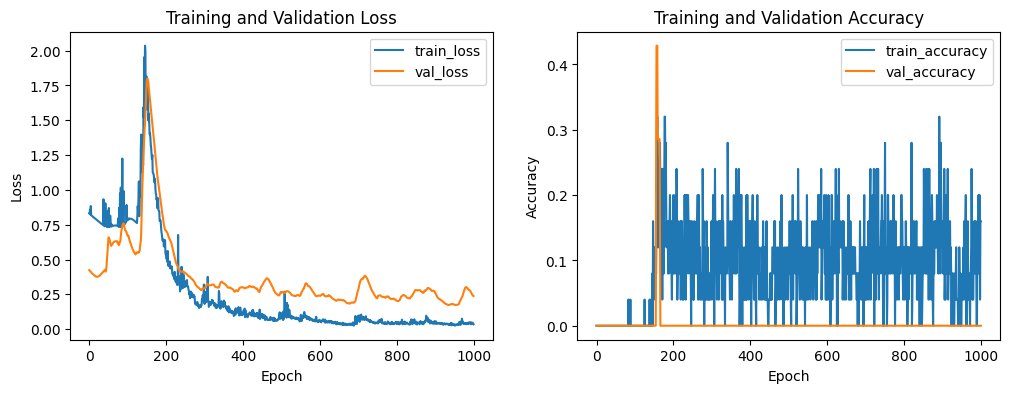

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



In [26]:
model.summary()
pred = model.predict(X_test)
results = model.evaluate(X_test, y_test, batch_size=32)
print("Model Evaluate Results:")
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 817)                 │         209,969 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,365,717 (256.98 MB)

 Trainable params: 22,455,089 (85.66 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 44,910,180 (171.32 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step - accuracy: 0.0000e+00 - loss: 0.7155
Model Evaluate Results:
loss: 0.7155
compile_metrics: 0.0000


In [27]:
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score
import tensorflow.keras.backend as K
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping



def f1_score_metric(y_true, y_pred):
    y_pred_binary = K.round(y_pred)

    y_true = K.cast(y_true, 'float32')
    y_pred_binary = K.cast(y_pred_binary, 'float32')

    true_positives = K.sum(K.round(K.clip(y_true * y_pred_binary, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred_binary, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

In [35]:
from tensorflow.keras.callbacks import LearningRateScheduler

from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), f1_score_metric, 'AUC', iou])


early_stopping = EarlyStopping(monitor='val_f1_score_metric', patience=30, restore_best_weights=True)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val),epochs=200)





Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - AUC: 1.0000 - accuracy: 0.0526 - f1_score_metric: 1.0000 - iou: 1.0000 - loss: 5.7323e-04 - precision_2: 1.0000 - recall_2: 1.0000 - val_AUC: 0.6363 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.1446 - val_iou: 0.0721 - val_loss: 0.2528 - val_precision_2: 0.1277 - val_recall_2: 0.1667
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - AUC: 1.0000 - accuracy: 0.0000e+00 - f1_score_metric: 0.9985 - iou: 0.9982 - loss: 7.7488e-04 - precision_2: 0.9969 - recall_2: 1.0000 - val_AUC: 0.6366 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.1446 - val_iou: 0.0721 - val_loss: 0.2578 - val_precision_2: 0.1277 - val_recall_2: 0.1667
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - AUC: 1.0000 - accuracy: 0.1053 - f1_score_metric: 1.0000 - iou: 1.0000 - loss: 7.0383e-04 - precision_2: 1.0000 - recall_2: 1.0000 - val_AUC: 0.6367 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.1358 - val_iou: 0.0678 - val_loss: 0.2614 - val_preci

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'f1_score_metric', 'loss', 'precision_2', 'recall_2', 'val_accuracy', 'val_f1_score_metric', 'val_loss', 'val_precision_2', 'val_recall_2'])

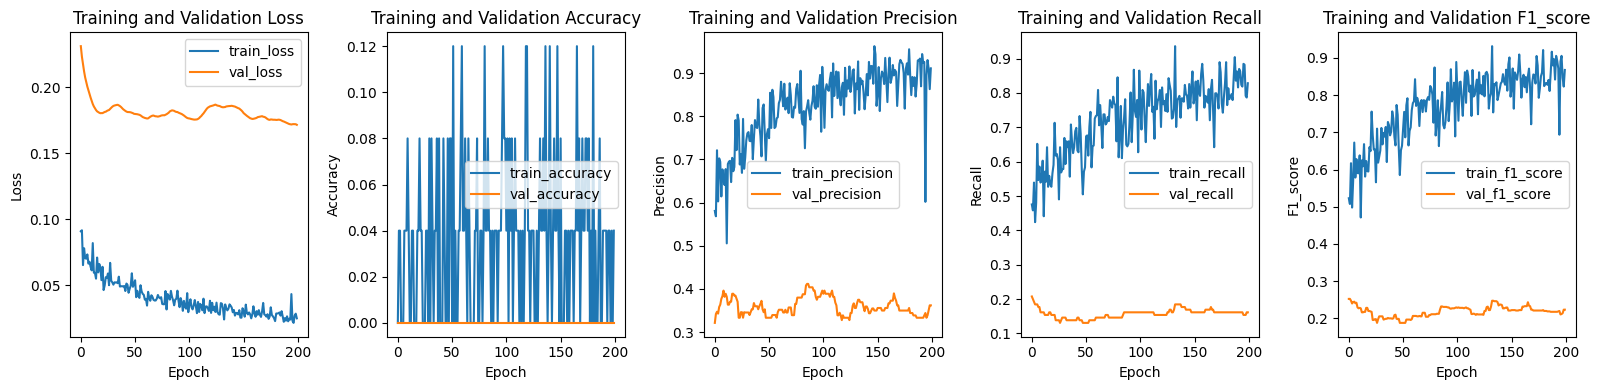

In [ ]:
plt.figure(figsize=(16, 4))

# Plot training and validation loss
plt.subplot(1, 5, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 5, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation precision
plt.subplot(1, 5, 3)
plt.plot(history.history['precision_2'], label='train_precision')
plt.plot(history.history['val_precision_2'], label='val_precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Plot training and validation recall
plt.subplot(1, 5, 4)
plt.plot(history.history['recall_2'], label='train_recall')
plt.plot(history.history['val_recall_2'], label='val_recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Plot training and validation F1 score
plt.subplot(1, 5, 5)
plt.plot(history.history['f1_score_metric'], label='train_f1_score')
plt.plot(history.history['val_f1_score_metric'], label='val_f1_score')
plt.title('Training and Validation F1_score')
plt.xlabel('Epoch')
plt.ylabel('F1_score')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
model.summary()
y_pred_probs = model.predict(X_test)

y_pred = (y_pred_probs > 0.5).astype(int)

results = model.evaluate(X_test, y_test, batch_size=32)
print("Model Evaluate Results:")
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 817)                 │         209,969 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,010,517 (3.85 MB)

 Trainable params: 336,689 (1.28 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 673,380 (2.57 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.6228 - accuracy: 0.0000e+00 - f1_score_metric: 0.2456 - iou: 0.1457 - loss: 0.9395 - precision_2: 0.3218 - recall_2: 0.1986
Model Evaluate Results:
loss: 0.9395
compile_metrics: 0.0000


In [38]:
# Define a CNN model, not using any regularazation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))  # 256 filters, 3x3 kernel
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dense(y_train_labels.shape[1], activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), f1_score_metric, 'AUC', iou])


early_stopping = EarlyStopping(monitor='val_f1_score_metric', patience=30, restore_best_weights=True)


In [39]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - AUC: 0.5632 - accuracy: 0.0000e+00 - f1_score_metric: 0.0467 - iou: 0.0238 - loss: 0.6968 - precision_4: 0.0244 - recall_4: 0.5754 - val_AUC: 0.5932 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.0455 - val_iou: 0.0229 - val_loss: 0.6721 - val_precision_4: 0.0257 - val_recall_4: 0.1944
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - AUC: 0.6707 - accuracy: 0.0526 - f1_score_metric: 0.1044 - iou: 0.0546 - loss: 0.5777 - precision_4: 0.0603 - recall_4: 0.3877 - val_AUC: 0.6136 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.1857 - val_iou: 0.1011 - val_loss: 0.6384 - val_precision_4: 0.1912 - val_recall_4: 0.1806
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - AUC: 0.7152 - accuracy: 0.0000e+00 - f1_score_metric: 0.2979 - iou: 0.1814 - loss: 0.3875 - precision_4: 0.3359 - recall_4: 0.2677 - val_AUC: 0.6369 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.2222 - val_iou: 0.1275 - val_loss: 0.5765 - val_precision_4: 

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'f1_score_metric', 'loss', 'precision_6', 'recall_6', 'val_accuracy', 'val_f1_score_metric', 'val_loss', 'val_precision_6', 'val_recall_6'])

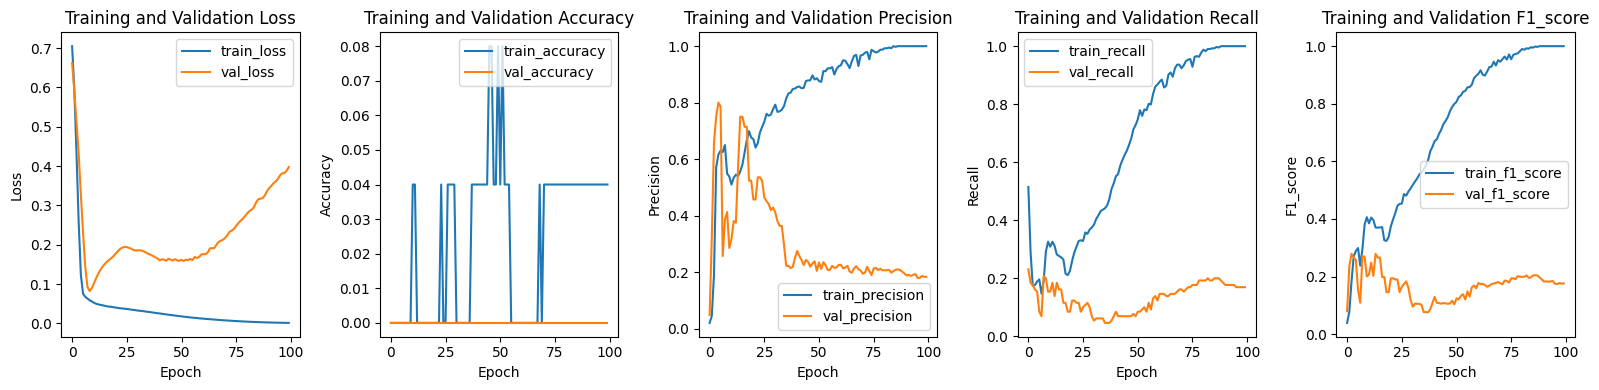

In [ ]:
plt.figure(figsize=(16, 4))

# Plot training and validation loss
plt.subplot(1, 5, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 5, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation precision
plt.subplot(1, 5, 3)
plt.plot(history.history['precision_6'], label='train_precision')
plt.plot(history.history['val_precision_6'], label='val_precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Plot training and validation recall
plt.subplot(1, 5, 4)
plt.plot(history.history['recall_6'], label='train_recall')
plt.plot(history.history['val_recall_6'], label='val_recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Plot training and validation F1 score
plt.subplot(1, 5, 5)
plt.plot(history.history['f1_score_metric'], label='train_f1_score')
plt.plot(history.history['val_f1_score_metric'], label='val_f1_score')
plt.title('Training and Validation F1_score')
plt.xlabel('Epoch')
plt.ylabel('F1_score')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
model.summary()
y_pred_probs = model.predict(X_test)

y_pred = (y_pred_probs > 0.5).astype(int)

results = model.evaluate(X_test, y_test, batch_size=32)
print("Model Evaluate Results:")
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 817)                 │         209,969 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,010,517 (3.85 MB)

 Trainable params: 336,689 (1.28 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 673,380 (2.57 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - AUC: 0.8263 - accuracy: 0.0000e+00 - f1_score_metric: 0.4601 - iou: 0.2994 - loss: 0.1570 - precision_4: 0.4054 - recall_4: 0.5319   
Model Evaluate Results:
loss: 0.1570
compile_metrics: 0.0000


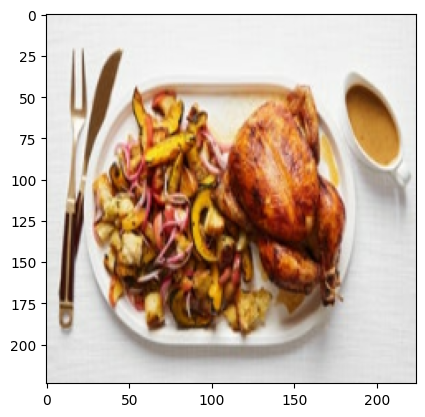

In [ ]:
import matplotlib.pyplot as plt

image_to_plot = images[0]


plt.imshow(image_to_plot, cmap='viridis')
plt.show()

In [ ]:
image_test='/content/drive/MyDrive/DeepLearning/Project/data/zucchini-patties-51245270.jpg'

In [ ]:
import numpy as np

new_image_path = image_test

new_image = load_and_preprocess_image(new_image_path, image_height, image_width)

input_data = np.array([new_image])

predictions = model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


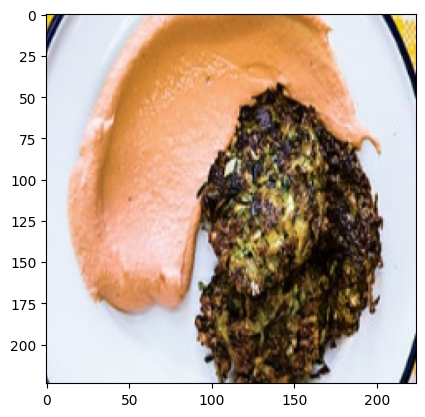

In [ ]:
plt.imshow(new_image, cmap='viridis')
plt.show()

In [ ]:
threshold = 0.7
true_ingredients = []

for i in range(len(predictions[0])):
    if predictions[0][i] >= threshold:
        true_ingredients.append(labels.columns[i])

print("True Ingredients:", true_ingredients)

True Ingredients: ['bay leaf', 'butter', 'celery', 'chicken', 'cinnamon', 'cumin', 'lemon', 'lemon juice', 'margarine', 'mince', 'oil', 'olive', 'rice', 'stock', 'tea', 'tomato']


In [41]:
# Define a CNN model,  using l2 regularazation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))  # 256 filters, 3x3 kernel
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(1e-4)))

model.add(Dense(y_train_labels.shape[1], activation='sigmoid'))
model.summary()

model.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), f1_score_metric, 'AUC', iou])


early_stopping = EarlyStopping(monitor='val_f1_score_metric', patience=30, restore_best_weights=True)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 817)                 │         105,393 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,457 (1.01 MB)

 Trainable params: 265,009 (1.01 MB)

 Non-trainable params: 448 (1.75 KB)

In [42]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - AUC: 0.4798 - accuracy: 0.0000e+00 - f1_score_metric: 0.0373 - iou: 0.0189 - loss: 0.7166 - precision_5: 0.0194 - recall_5: 0.4646 - val_AUC: 0.5596 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.0403 - val_iou: 0.0201 - val_loss: 0.6892 - val_precision_5: 0.0218 - val_recall_5: 0.2639
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - AUC: 0.5801 - accuracy: 0.0000e+00 - f1_score_metric: 0.0609 - iou: 0.0313 - loss: 0.6438 - precision_5: 0.0336 - recall_5: 0.3292 - val_AUC: 0.5944 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.0714 - val_iou: 0.0346 - val_loss: 0.6187 - val_precision_5: 0.0481 - val_recall_5: 0.1389
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - AUC: 0.6697 - accuracy: 0.0000e+00 - f1_score_metric: 0.1560 - iou: 0.0825 - loss: 0.4859 - precision_5: 0.1073 - recall_5: 0.2862 - val_AUC: 0.6144 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.1416 - val_iou: 0.0689 - val_loss: 0.5165 - val_precision

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'f1_score_metric', 'loss', 'precision_7', 'recall_7', 'val_accuracy', 'val_f1_score_metric', 'val_loss', 'val_precision_7', 'val_recall_7'])

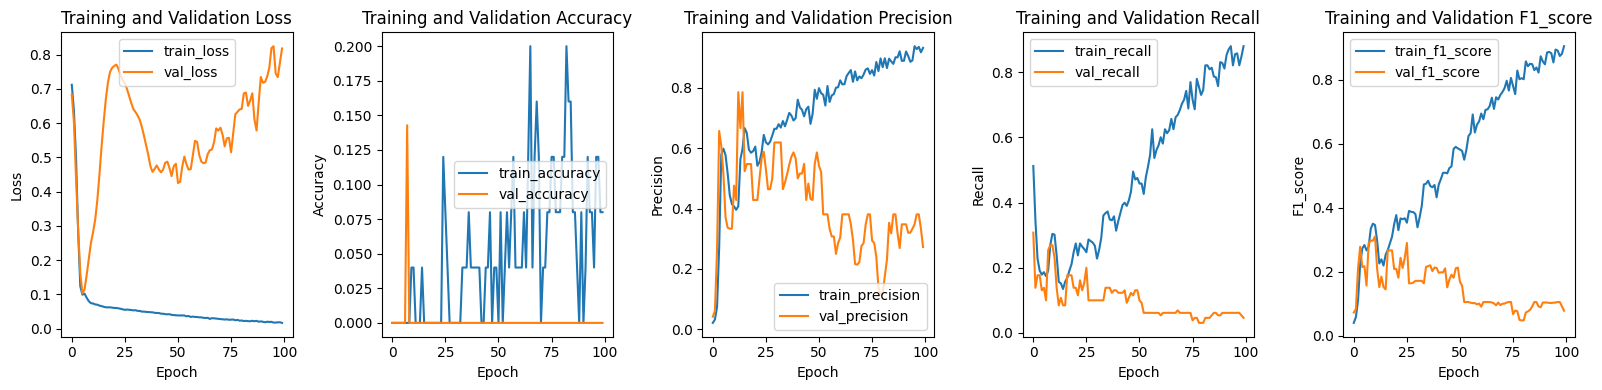

In [ ]:
plt.figure(figsize=(16, 4))

# Plot training and validation loss
plt.subplot(1, 5, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 5, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation precision
plt.subplot(1, 5, 3)
plt.plot(history.history['precision_7'], label='train_precision')
plt.plot(history.history['val_precision_7'], label='val_precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Plot training and validation recall
plt.subplot(1, 5, 4)
plt.plot(history.history['recall_7'], label='train_recall')
plt.plot(history.history['val_recall_7'], label='val_recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Plot training and validation F1 score
plt.subplot(1, 5, 5)
plt.plot(history.history['f1_score_metric'], label='train_f1_score')
plt.plot(history.history['val_f1_score_metric'], label='val_f1_score')
plt.title('Training and Validation F1_score')
plt.xlabel('Epoch')
plt.ylabel('F1_score')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
model.summary()
y_pred_probs = model.predict(X_test)

y_pred = (y_pred_probs > 0.5).astype(int)

results = model.evaluate(X_test, y_test, batch_size=32)
print("Model Evaluate Results:")
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 817)                 │         105,393 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 795,477 (3.03 MB)

 Trainable params: 265,009 (1.01 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 530,020 (2.02 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - AUC: 0.7766 - accuracy: 0.0000e+00 - f1_score_metric: 0.4215 - iou: 0.2670 - loss: 0.2159 - precision_5: 0.4583 - recall_5: 0.3901
Model Evaluate Results:
loss: 0.2159
compile_metrics: 0.0000


In [ ]:

new_image_path = image_test

new_image = load_and_preprocess_image(new_image_path, image_height, image_width)

input_data = np.array([new_image])

predictions = model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


In [ ]:
threshold = 0.2
true_ingredients = []

for i in range(len(predictions[0])):

    if predictions[0][i] >= threshold:
        true_ingredients.append(labels.columns[i])

print("True Ingredients:", true_ingredients)

True Ingredients: ['ham', 'lemon', 'lemon juice', 'salt', 'tea']


In [45]:
IMG_SIZE = 224

In [47]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.metrics import Precision, Recall
feature_extractor = ResNet50(include_top=False,
                             weights='imagenet',
                             input_shape=(IMG_SIZE, IMG_SIZE, 3))
feature_extractor.trainable = False  # Freeze the base ResNet50
for layer in feature_extractor.layers[-100:]:
    layer.trainable = True
model = models.Sequential([
    tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.Lambda(resnet50_preprocess),  # Preprocessing
    tf.keras.layers.RandomFlip("horizontal"),  # Data Augmentation
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    feature_extractor,  # Feature extractor
    tf.keras.layers.GlobalAveragePooling2D(),  # Pooling
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),  # Dense layer
    tf.keras.layers.Dropout(0.5),  # Dropout
    tf.keras.layers.Dense(y_train_labels.shape[1], activation='sigmoid')  # Multi-label classification
])
# lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.2,  # Decrease learning rate by a larger factor
#     patience=10,  # Reduce patience to 2 epochs
#     verbose=1,
#     min_delta=1e-5  # Trigger learning rate reduction on smaller changes in validation loss
# )
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,  # Increased learning rate
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), f1_score_metric, 'AUC', iou])
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_f1_score_metric', mode='max', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/DeepLearning/Project/best_model.keras', save_best_only=True),
]



In [ ]:
y_train_labels.shape[1]

817

In [34]:
# Custom IoU metric function
def iou(y_true, y_pred, threshold=0.5):
    """Compute Intersection over Union (IoU) metric for multi-label classification."""
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred > threshold, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred, axis=-1)
    union = tf.reduce_sum(y_true + y_pred, axis=-1) - intersection
    return tf.reduce_mean(intersection / (union + tf.keras.backend.epsilon()))


In [59]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay

feature_extractor = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in feature_extractor.layers[-100:]:
    layer.trainable = True

model = models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Lambda(resnet50_preprocess),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),

    feature_extractor,
    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(y_train_labels.shape[1], activation='sigmoid')
])

# # Optimizer with learning rate scheduler
# lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
#     initial_learning_rate=1e-3,
#     decay_steps=5000,  # More gradual decay
#     alpha=1e-5  # Minimum learning rate
# )
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.summary()
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), f1_score_metric, "AUC", iou])
callbacks = [
    # tf.keras.callbacks.EarlyStopping(monitor='val_f1_score_metric', mode='max', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/DeepLearning/Project/best_model.keras', save_best_only=True)
]




Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_3 (Lambda)                    │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_5 (RandomFlip)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_5 (RandomRotation)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_5 (RandomZoom)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast_4 (RandomContrast)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_9           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 817)                 │         105,393 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,910,001 (95.02 MB)

 Trainable params: 24,855,089 (94.81 MB)

 Non-trainable params: 54,912 (214.50 KB)

In [60]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=callbacks)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step - AUC: 0.5000 - accuracy: 0.0000e+00 - f1_score_metric: 0.0390 - iou: 0.0199 - loss: 0.8262 - precision_11: 0.0203 - recall_11: 0.4800 - val_AUC: 0.5076 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.0302 - val_iou: 0.0153 - val_loss: 0.8304 - val_precision_11: 0.0155 - val_recall_11: 0.5278
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - AUC: 0.5113 - accuracy: 0.0000e+00 - f1_score_metric: 0.0410 - iou: 0.0209 - loss: 0.8362 - precision_11: 0.0214 - recall_11: 0.5138 - val_AUC: 0.4901 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.0312 - val_iou: 0.0158 - val_loss: 0.8298 - val_precision_11: 0.0161 - val_recall_11: 0.5556
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - AUC: 0.4887 - accuracy: 0.0000e+00 - f1_score_metric: 0.0381 - iou: 0.0193 - loss: 0.8331 - precision_11: 0.0198 - recall_11: 0.4708 - val_AUC: 0.4775 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.0265 - val_iou: 0.0134 - val_loss: 0.8330 - val_pr

In [ ]:
history.history.keys()

dict_keys(['AUC', 'accuracy', 'f1_score_metric', 'iou', 'loss', 'precision_27', 'recall_27', 'val_AUC', 'val_accuracy', 'val_f1_score_metric', 'val_iou', 'val_loss', 'val_precision_27', 'val_recall_27'])

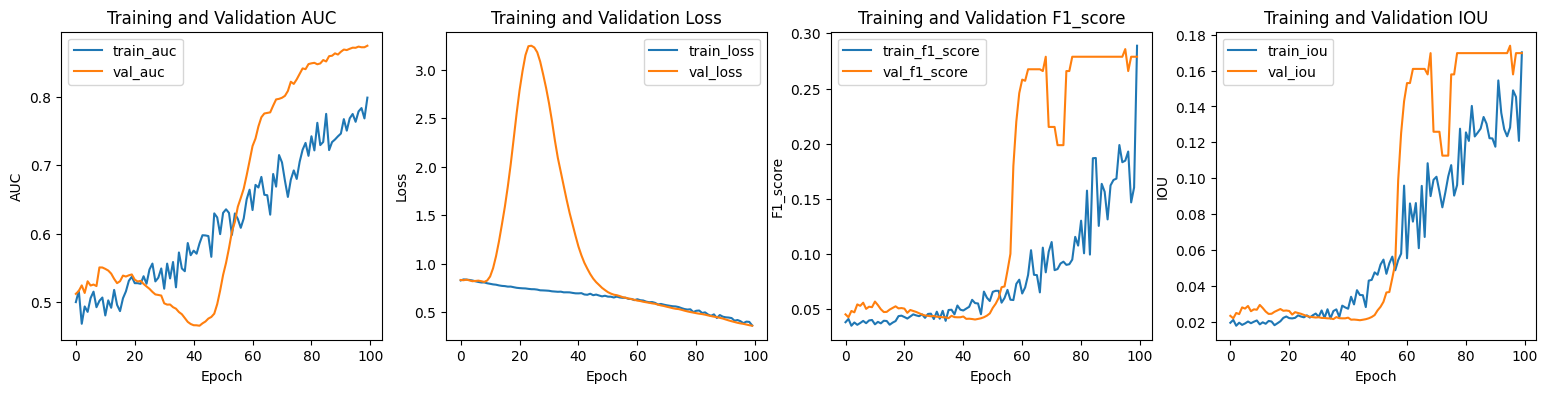

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 4))

# Plot training and validation loss
plt.subplot(1, 5, 1)
plt.plot(history.history['AUC'], label='train_auc')
plt.plot(history.history['val_AUC'], label='val_auc')
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.subplot(1, 5,2)

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 5, 3)
plt.plot(history.history['f1_score_metric'], label='train_f1_score')
plt.plot(history.history['val_f1_score_metric'], label='val_f1_score')
plt.title('Training and Validation F1_score')
plt.xlabel('Epoch')
plt.ylabel('F1_score')
plt.legend()


plt.subplot(1, 5, 4)
plt.plot(history.history['iou'], label='train_iou')
plt.plot(history.history['val_iou'], label='val_iou')
plt.title('Training and Validation IOU')
plt.xlabel('Epoch')
plt.ylabel('IOU')
plt.legend()
# plt.tight_layout()
# plt.show()


In [61]:
model.summary()
y_pred_probs = model.predict(X_test)

y_pred = (y_pred_probs > 0.5).astype(int)

results = model.evaluate(X_test, y_test, batch_size=32)
print("Model Evaluate Results:")
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_3 (Lambda)                    │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_5 (RandomFlip)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_5 (RandomRotation)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_5 (RandomZoom)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast_4 (RandomContrast)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_9           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 817)                 │         105,393 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,620,180 (284.65 MB)

 Trainable params: 24,855,089 (94.81 MB)

 Non-trainable params: 54,912 (214.50 KB)

 Optimizer params: 49,710,179 (189.63 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - AUC: 0.8750 - accuracy: 0.0000e+00 - f1_score_metric: 0.2951 - iou: 0.1870 - loss: 0.2813 - precision_11: 0.6429 - recall_11: 0.1915
Model Evaluate Results:
loss: 0.2813
compile_metrics: 0.0000


In [51]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

feature_extractor = EfficientNetB3(include_top=False,
                                   weights='imagenet',
                                   input_shape=(224, 224, 3))

for layer in feature_extractor.layers[-50:]:
    layer.trainable = True

model = models.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),

    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),

    feature_extractor,

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),

    tf.keras.layers.Dense(y_train_labels.shape[1], activation='sigmoid')
])

adamw_optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-4, weight_decay=1e-5)

model.compile(optimizer=adamw_optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), 'AUC', iou, f1_score_metric])

callbacks = [
    #tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True, mode='max'),
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/DeepLearning/Project/best_model_efficientnetb3.keras',
                                       save_best_only=True)
]




43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [52]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=callbacks)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 78s 78s/step - AUC: 0.5076 - accuracy: 0.0000e+00 - f1_score_metric: 0.0415 - iou: 0.0211 - loss: 0.8236 - precision_9: 0.0216 - recall_9: 0.5169 - val_AUC: 0.5053 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.0264 - val_iou: 0.0133 - val_loss: 0.8197 - val_precision_9: 0.0136 - val_recall_9: 0.4167
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - AUC: 0.5235 - accuracy: 0.0000e+00 - f1_score_metric: 0.0430 - iou: 0.0218 - loss: 0.8211 - precision_9: 0.0224 - recall_9: 0.5200 - val_AUC: 0.5031 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.0268 - val_iou: 0.0135 - val_loss: 0.8191 - val_precision_9: 0.0139 - val_recall_9: 0.4167
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - AUC: 0.5093 - accuracy: 0.0000e+00 - f1_score_metric: 0.0431 - iou: 0.0222 - loss: 0.8203 - precision_9: 0.0225 - recall_9: 0.5169 - val_AUC: 0.5079 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.0273 - val_iou: 0.0137 - val_loss: 0.8184 - val_precision_9: 0.

In [ ]:
history.history.keys()

dict_keys(['AUC', 'accuracy', 'f1_score_metric', 'iou', 'loss', 'precision_29', 'recall_29', 'val_AUC', 'val_accuracy', 'val_f1_score_metric', 'val_iou', 'val_loss', 'val_precision_29', 'val_recall_29'])

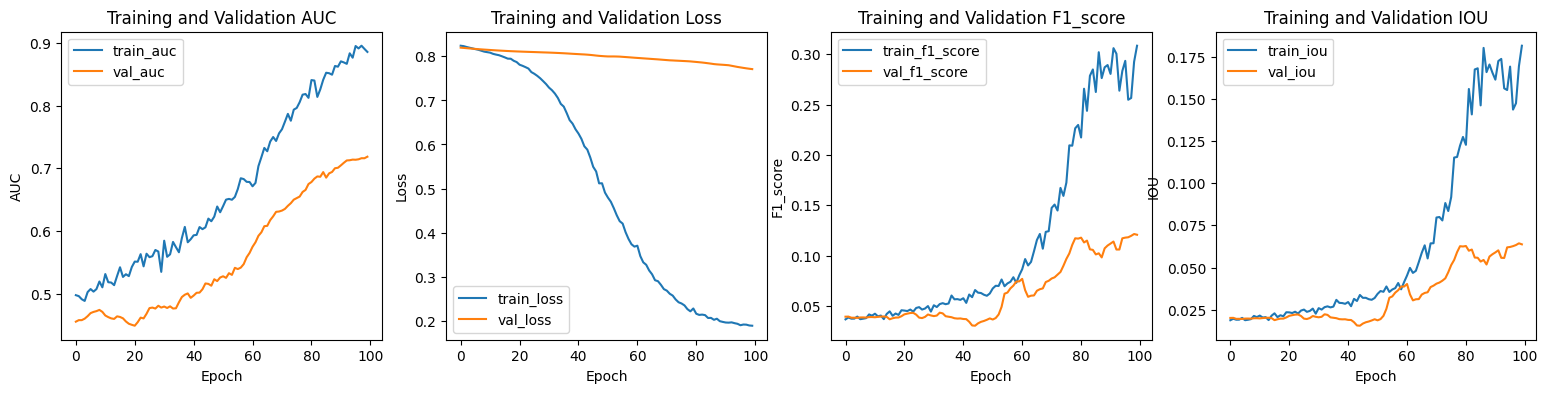

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 4))

# Plot training and validation loss
plt.subplot(1, 5, 1)
plt.plot(history.history['AUC'], label='train_auc')
plt.plot(history.history['val_AUC'], label='val_auc')
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.subplot(1, 5,2)

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 5, 3)
plt.plot(history.history['f1_score_metric'], label='train_f1_score')
plt.plot(history.history['val_f1_score_metric'], label='val_f1_score')
plt.title('Training and Validation F1_score')
plt.xlabel('Epoch')
plt.ylabel('F1_score')
plt.legend()


plt.subplot(1, 5, 4)
plt.plot(history.history['iou'], label='train_iou')
plt.plot(history.history['val_iou'], label='val_iou')
plt.title('Training and Validation IOU')
plt.xlabel('Epoch')
plt.ylabel('IOU')
plt.legend()



In [53]:
model.summary()
y_pred_probs = model.predict(X_test)

y_pred = (y_pred_probs > 0.5).astype(int)

results = model.evaluate(X_test, y_test, batch_size=32)
print("Model Evaluate Results:")
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_3 (RandomFlip)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_3 (RandomRotation)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_3 (RandomZoom)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast_2 (RandomContrast)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb3 (Functional)          │ (None, 7, 7, 1536)          │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │         786,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 817)                 │         105,393 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,345,684 (134.83 MB)

 Trainable params: 11,752,793 (44.83 MB)

 Non-trainable params: 87,303 (341.03 KB)

 Optimizer params: 23,505,588 (89.67 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - AUC: 0.8564 - accuracy: 0.0000e+00 - f1_score_metric: 0.3249 - iou: 0.2029 - loss: 0.5977 - precision_9: 0.5714 - recall_9: 0.2270
Model Evaluate Results:
loss: 0.5977
compile_metrics: 0.0000


In [ ]:
!pip install scikeras


In [55]:
#from scikeras.wrappers import KerasClassifier
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.model_selection import GridSearchCV

def create_model(learning_rate=1e-4, dropout_rate=0.5, filters=32, kernel_size=(3, 3)):
    model = models.Sequential([
        tf.keras.layers.Input(shape=(224, 224, 3)),

        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomContrast(0.2),

        tf.keras.layers.Conv2D(filters, kernel_size, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(filters*2, kernel_size, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(filters*4, kernel_size, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(filters*8, kernel_size, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.GlobalAveragePooling2D(),

        tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        tf.keras.layers.Dropout(dropout_rate),

        tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        tf.keras.layers.Dropout(dropout_rate),

        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),

        tf.keras.layers.Dense(y_train_labels.shape[1], activation='sigmoid')
    ])

    adamw_optimizer = tf.keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay=1e-5)

    model.compile(optimizer=adamw_optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy', Precision(), Recall(), 'AUC', iou, f1_score_metric])

    return model

# model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=1)

# param_grid = {
#     'learning_rate': [1e-4, 1e-3],
#     'dropout_rate': [0.4, 0.5, 0.6],
#     'filters': [32, 64, 128],
#     'kernel_size': [(3, 3), (5, 5)],
#     'batch_size': [32, 64],
#     'epochs': [10, 20]
# }




In [56]:
model = create_model()
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_4 (RandomFlip)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_4 (RandomRotation)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_4 (RandomZoom)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast_3 (RandomContrast)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 817)                 │         105,393 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 789,617 (3.01 MB)

 Trainable params: 789,617 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - AUC: 0.4710 - accuracy: 0.0000e+00 - f1_score_metric: 0.0352 - iou: 0.0178 - loss: 0.7783 - precision_10: 0.0183 - recall_10: 0.4338 - val_AUC: 0.5103 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.0267 - val_iou: 0.0135 - val_loss: 0.7779 - val_precision_10: 0.0138 - val_recall_10: 0.4444
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - AUC: 0.4947 - accuracy: 0.0000e+00 - f1_score_metric: 0.0391 - iou: 0.0199 - loss: 0.7779 - precision_10: 0.0204 - recall_10: 0.4738 - val_AUC: 0.4912 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.0298 - val_iou: 0.0150 - val_loss: 0.7774 - val_precision_10: 0.0154 - val_recall_10: 0.4722
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - AUC: 0.5149 - accuracy: 0.0000e+00 - f1_score_metric: 0.0417 - iou: 0.0211 - loss: 0.7774 - precision_10: 0.0218 - recall_10: 0.4892 - val_AUC: 0.4987 - val_accuracy: 0.0000e+00 - val_f1_score_metric: 0.0311 - val_iou: 0.0157 - val_loss: 0.7770 - val_p

In [181]:
history.history.keys()

dict_keys(['AUC', 'accuracy', 'f1_score_metric', 'iou', 'loss', 'precision_32', 'recall_32', 'val_AUC', 'val_accuracy', 'val_f1_score_metric', 'val_iou', 'val_loss', 'val_precision_32', 'val_recall_32'])

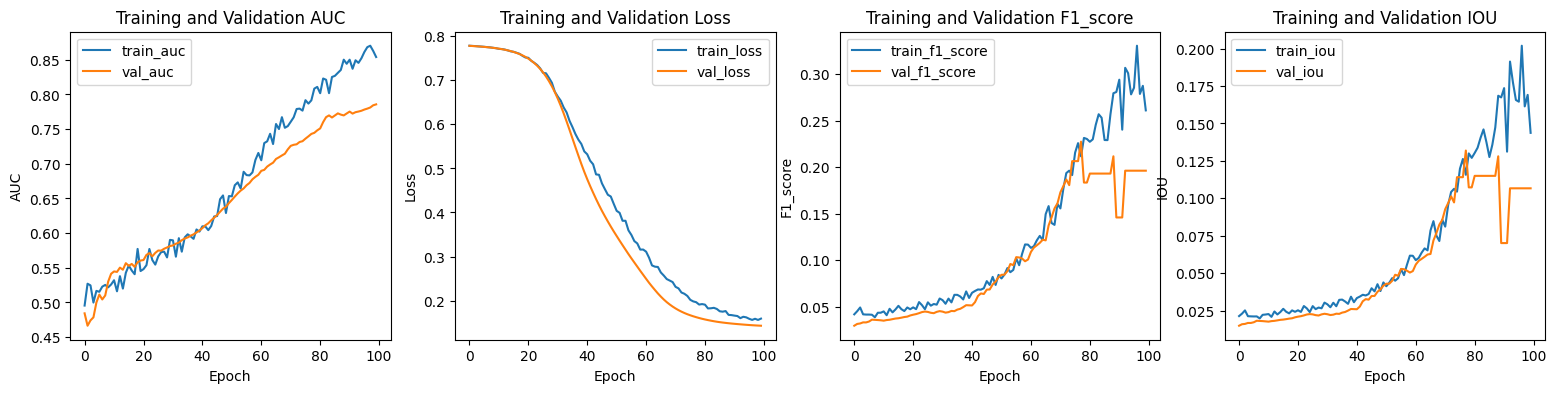

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 4))

# Plot training and validation loss
plt.subplot(1, 5, 1)
plt.plot(history.history['AUC'], label='train_auc')
plt.plot(history.history['val_AUC'], label='val_auc')
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.subplot(1, 5,2)

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 5, 3)
plt.plot(history.history['f1_score_metric'], label='train_f1_score')
plt.plot(history.history['val_f1_score_metric'], label='val_f1_score')
plt.title('Training and Validation F1_score')
plt.xlabel('Epoch')
plt.ylabel('F1_score')
plt.legend()


plt.subplot(1, 5, 4)
plt.plot(history.history['iou'], label='train_iou')
plt.plot(history.history['val_iou'], label='val_iou')
plt.title('Training and Validation IOU')
plt.xlabel('Epoch')
plt.ylabel('IOU')
plt.legend()



In [58]:
model.summary()
y_pred_probs = model.predict(X_test)

y_pred = (y_pred_probs > 0.5).astype(int)

results = model.evaluate(X_test, y_test, batch_size=32)
print("Model Evaluate Results:")
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_4 (RandomFlip)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_4 (RandomRotation)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_4 (RandomZoom)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_contrast_3 (RandomContrast)   │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 817)                 │         105,393 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,368,853 (9.04 MB)

 Trainable params: 789,617 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,579,236 (6.02 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - AUC: 0.8493 - accuracy: 0.0000e+00 - f1_score_metric: 0.2273 - iou: 0.1397 - loss: 0.1590 - precision_10: 0.5714 - recall_10: 0.1418
Model Evaluate Results:
loss: 0.1590
compile_metrics: 0.0000


In [ ]:
# import numpy as np
# from tensorflow.keras import layers, models
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.optimizers import Adam, AdamW
# import tensorflow as tf
# from sklearn.base import BaseEstimator

# # Define the custom model builder function
# def create_model(learning_rate=1e-4, dropout_rate=0.5, filters=32, kernel_size=(3, 3)):
#     model = models.Sequential([
#         tf.keras.layers.Input(shape=(224, 224, 3)),

#         # Data Augmentation Layers
#         tf.keras.layers.RandomFlip("horizontal"),
#         tf.keras.layers.RandomRotation(0.2),
#         tf.keras.layers.RandomZoom(0.2),
#         tf.keras.layers.RandomContrast(0.2),

#         # Convolutional layers
#         tf.keras.layers.Conv2D(filters, kernel_size, activation='relu', padding='same'),
#         tf.keras.layers.MaxPooling2D((2, 2)),

#         tf.keras.layers.Conv2D(filters*2, kernel_size, activation='relu', padding='same'),
#         tf.keras.layers.MaxPooling2D((2, 2)),

#         tf.keras.layers.Conv2D(filters*4, kernel_size, activation='relu', padding='same'),
#         tf.keras.layers.MaxPooling2D((2, 2)),

#         tf.keras.layers.Conv2D(filters*8, kernel_size, activation='relu', padding='same'),
#         tf.keras.layers.MaxPooling2D((2, 2)),

#         # Global Average Pooling
#         tf.keras.layers.GlobalAveragePooling2D(),

#         # Dense layers with dropout
#         tf.keras.layers.Dense(512, activation='relu'),
#         tf.keras.layers.Dropout(dropout_rate),

#         tf.keras.layers.Dense(256, activation='relu'),
#         tf.keras.layers.Dropout(dropout_rate),

#         tf.keras.layers.Dense(128, activation='relu'),

#         # Output layer for multi-label classification
#         tf.keras.layers.Dense(10, activation='sigmoid')  # Assuming 10 output labels for multi-label classification
#     ])

#     # Define optimizer and compile model
#     adamw_optimizer = AdamW(learning_rate=learning_rate, weight_decay=1e-5)
#     model.compile(optimizer=adamw_optimizer,
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])

#     return model

# # Custom wrapper class to use with GridSearchCV
# class KerasModel(BaseEstimator):
#     def __init__(self, learning_rate=1e-4, dropout_rate=0.5, filters=32, kernel_size=(3, 3)):
#         self.learning_rate = learning_rate
#         self.dropout_rate = dropout_rate
#         self.filters = filters
#         self.kernel_size = kernel_size
#         self.model = None

#     def fit(self, X, y):
#         self.model = create_model(self.learning_rate, self.dropout_rate, self.filters, self.kernel_size)
#         self.model.fit(X, y, epochs=10, batch_size=32, verbose=0)
#         return self

#     def predict(self, X):
#         return self.model.predict(X, verbose=0)

# # Define hyperparameters for GridSearchCV
# param_grid = {
#     'learning_rate': [1e-4, 1e-3],
#     'dropout_rate': [0.4, 0.5, 0.6],
#     'filters': [32, 64],
#     'kernel_size': [(3, 3), (5, 5)],
# }

# # Initialize KerasModel class
# keras_model = KerasModel()

# # # Perform GridSearchCV with cross-validation
# # grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # # Fit the model with grid search
# # grid_result = grid_search.fit(X_train, y_train)

# # # Print the best parameters found during the grid search
# # print(f"Best Score: {grid_result.best_score_} using {grid_result.best_params_}")


TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator KerasModel() does not.

In [ ]:
# from sklearn.metrics import make_scorer, accuracy_score

# # Define a custom scorer using accuracy
# accuracy_scorer = make_scorer(accuracy_score)

# # Perform GridSearchCV with cross-validation and custom scorer
# grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring=accuracy_scorer)

# # Fit the model with grid search
# grid_result = grid_search.fit(X_train, y_train)

# # Print the best parameters found during the grid search
# print(f"Best Score: {grid_result.best_score_} using {grid_result.best_params_}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits


ValueError: 
All the 72 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-169-9dc0d0aa79c4>", line 67, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 701, in binary_crossentropy
    raise ValueError(
ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 817), output.shape=(None, 10)

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-169-9dc0d0aa79c4>", line 66, in fit
  File "<ipython-input-169-9dc0d0aa79c4>", line 10, in create_model
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 75, in __init__
    self._maybe_rebuild()
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 140, in _maybe_rebuild
    self.build(input_shape)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 226, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 186, in build
    x = layer(x)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/random.py", line 34, in uniform
    return tf.random.stateless_uniform(
tensorflow.python.framework.errors_impl.ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:AddV2] name: 

--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-169-9dc0d0aa79c4>", line 66, in fit
  File "<ipython-input-169-9dc0d0aa79c4>", line 10, in create_model
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 75, in __init__
    self._maybe_rebuild()
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 140, in _maybe_rebuild
    self.build(input_shape)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 226, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 186, in build
    x = layer(x)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/random.py", line 34, in uniform
    return tf.random.stateless_uniform(
tensorflow.python.framework.errors_impl.ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul] name: 

--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-169-9dc0d0aa79c4>", line 67, in fit
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/constant_op.py", line 108, in convert_to_eager_tensor
    return ops.EagerTensor(value, ctx.device_name, dtype)
tensorflow.python.framework.errors_impl.InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-169-9dc0d0aa79c4>", line 66, in fit
  File "<ipython-input-169-9dc0d0aa79c4>", line 10, in create_model
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 75, in __init__
    self._maybe_rebuild()
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 140, in _maybe_rebuild
    self.build(input_shape)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 226, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 186, in build
    x = layer(x)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/random.py", line 34, in uniform
    return tf.random.stateless_uniform(
tensorflow.python.framework.errors_impl.ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[5,5,256,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2] name: 

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-169-9dc0d0aa79c4>", line 66, in fit
  File "<ipython-input-169-9dc0d0aa79c4>", line 10, in create_model
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 75, in __init__
    self._maybe_rebuild()
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 140, in _maybe_rebuild
    self.build(input_shape)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 226, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 186, in build
    x = layer(x)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/random.py", line 34, in uniform
    return tf.random.stateless_uniform(
tensorflow.python.framework.errors_impl.ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[3,3,256,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2] name: 

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "<ipython-input-169-9dc0d0aa79c4>", line 66, in fit
  File "<ipython-input-169-9dc0d0aa79c4>", line 10, in create_model
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 75, in __init__
    self._maybe_rebuild()
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 140, in _maybe_rebuild
    self.build(input_shape)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 226, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 186, in build
    x = layer(x)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/random.py", line 34, in uniform
    return tf.random.stateless_uniform(
tensorflow.python.framework.errors_impl.ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[5,5,128,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2] name: 


In [183]:
# # Print best model details
# #best_model = grid_result.best_estimator_

# # Evaluate on test data (replace X_test and y_test with actual test data)
# test_score = model.score(X_test, y_test)
# print(f"Test score: {test_score}")


AttributeError: 'Sequential' object has no attribute 'score'

In [184]:
image_test='/content/drive/MyDrive/DeepLearning/Project/data/zucchini-patties-51245270.jpg'
import numpy as np
new_image_path = image_test

new_image = load_and_preprocess_image(new_image_path, IMG_SIZE, IMG_SIZE)
input_data = np.array([new_image])

predictions = model.predict(input_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


In [185]:
predictions
len(predictions[0])

817

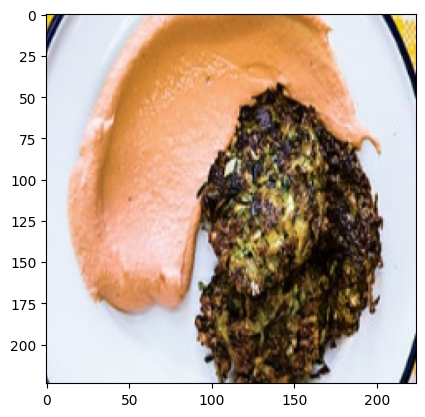

In [186]:
plt.imshow(new_image, cmap='viridis')
plt.show()

In [191]:
threshold = 0.7
true_ingredients = []

for i in range(len(predictions[0])):

    if predictions[0][i] >= threshold:
        true_ingredients.append(sf.columns[i])

print("True Ingredients:", true_ingredients)


True Ingredients: ['garlic', 'pepper', 'salt']


In [189]:
import tensorflow as tf

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

test_ds = test_ds.batch(32)

results = model.evaluate(test_ds, return_dict=True)

print(results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - AUC: 0.8464 - accuracy: 0.0000e+00 - f1_score_metric: 0.2727 - iou: 0.1704 - loss: 0.1551 - precision_32: 0.6857 - recall_32: 0.1702
{'AUC': 0.8464268445968628, 'accuracy': 0.0, 'f1_score_metric': 0.27272722125053406, 'iou': 0.17036084830760956, 'loss': 0.15505826473236084, 'precision_32': 0.6857143044471741, 'recall_32': 0.1702127605676651}
